In [2]:
from manim import *

Manim Community v0.11.0

In [25]:
class Charge(VGroup):
    def __init__(self, magnitude=1, point=ORIGIN, add_glow=True, **kwargs):
        VGroup.__init__(self, **kwargs)
        self.magnitude = magnitude
        self.point = point
        self.radius = (abs(magnitude) * 0.4 if abs(magnitude) < 2 else 0.8) * 0.3

        if magnitude > 0:
            label = VGroup(
                Rectangle(width=0.32 * 1.1, height=0.006 * 1.1).set_z_index(1),
                Rectangle(width=0.006 * 1.1, height=0.32 * 1.1).set_z_index(1),
            )
            color = RED
            layer_colors = [RED_D, RED_A]
            layer_radius = 4
        else:
            label = Rectangle(width=0.27, height=0.003)
            color = BLUE
            layer_colors = ["#3399FF", "#66B2FF"]
            layer_radius = 2

        if add_glow:  # use many arcs to simulate glowing
            layer_num = 80
            color_list = color_gradient(layer_colors, layer_num)
            opacity_func = lambda t: 1500 * (1 - abs(t - 0.009) ** 0.0001)
            rate_func = lambda t: t ** 2

            for i in range(layer_num):
                self.add(
                    Arc(
                        radius=layer_radius * rate_func((0.5 + i) / layer_num),
                        angle=TAU,
                        color=color_list[i],
                        stroke_width=101
                        * (rate_func((i + 1) / layer_num) - rate_func(i / layer_num))
                        * layer_radius,
                        stroke_opacity=opacity_func(rate_func(i / layer_num)),
                    ).shift(point)
                )

        self.add(Dot(point=self.point, radius=self.radius, color=color))
        self.add(label.scale(self.radius / 0.3).shift(point))
        for mob in self:
            mob.set_z_index(1)


class ElectricField(ArrowVectorField):
    def __init__(self, *charges: Charge, **kwargs):
        self.charges = charges
        super().__init__(
            lambda p: self.field_func(p),
            **kwargs
        )

    def field_func(self, p):
        direction = np.zeros(3)
        pos = []
        for charge in self.charges:
            p0, mag = charge.get_center(), charge.magnitude
            pos.append(p0)
            x, y, z = p - p0
            dist = (x ** 2 + y ** 2) ** 1.5
            if any((p - p0) ** 2 > 0.05):
                direction += mag * np.array([x / dist, y / dist, 0])
            else:
                direction += np.zeros(3)
        for p0 in pos:
            if all((p - p0) ** 2 <= 0.05):
                direction = np.zeros(3)
        return direction

class Current(VGroup):
    def __init__(self, magnitude=1, point=ORIGIN, add_glow=True, **kwargs):
        VGroup.__init__(self, **kwargs)
        self.magnitude = magnitude
        self.point = point
        self.radius = (abs(magnitude) * 0.4 if abs(magnitude) < 2 else 0.8) * 0.3

        if magnitude > 0:
            label = Dot(radius=0.2)
        else:
            label = VGroup(
                Line(ORIGIN, UR).move_to(ORIGIN),
                Line(ORIGIN, UL).move_to(ORIGIN),
            )
        self.add(Circle(color=WHITE), label).scale(0.2).shift(point)
        for mob in self:
            mob.set_z_index(1)
            
class MagneticField(ArrowVectorField):
    def __init__(self, *currents: Current, **kwargs):
        self.currents = currents
        super().__init__(
            lambda p: self.field_func(p),
            **kwargs
        )

    def field_func(self, p):
        direction = np.zeros(3)
        pos = []
        for current in self.currents:
            p0, mag = current.get_center(), current.magnitude
            pos.append(p0)
            x, y, z = p - p0
            dist = (x ** 2 + y ** 2) ** 1.5
            if any((p - p0) ** 2 >= 0.25):
                direction += mag * np.array([- y / dist, x / dist, 0])
        for p0 in pos:
            if all((p - p0) ** 2 < 0.25):
                direction = np.zeros(3)
        return direction

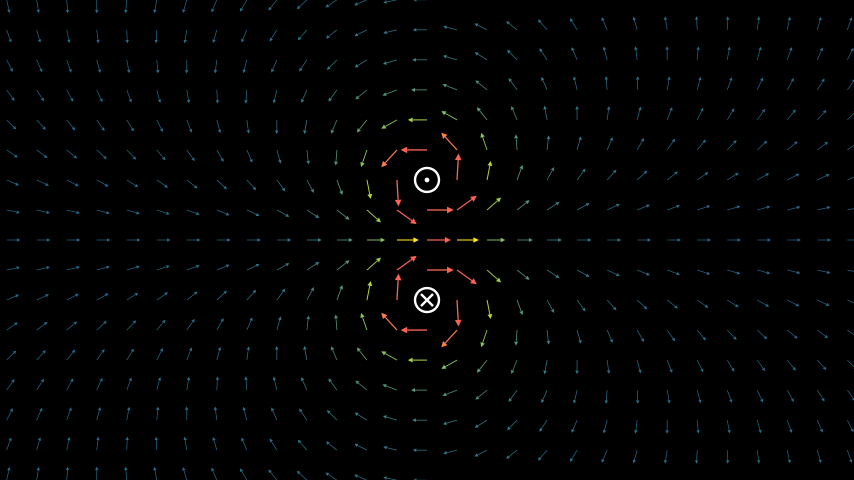

In [133]:
%%manim -ql -v WARNING PhysicsProject

class PhysicsProject(Scene):
    def construct(self):
        charge1 = Current(1, UP)
        charge2 = Current(-1, DOWN)
        field = MagneticField(charge1, charge2)
        self.add(charge1, charge2, field)

In [76]:
%%manim -ql -v WARNING FirstScene

class FirstScene(Scene):
    def construct(self):
        text0 = Tex(r"Les équations de Maxwell", font_size=60).shift(2*UP)
        text1 = Tex(r" - Maxwell Gauss \quad\quad\quad\quad\quad\quad $\operatorname{div} \vec{E}=\frac{\rho}{\epsilon_{0}}$", font_size=36).next_to(text0, DOWN*2, aligned_edge=LEFT)
        text2 = Tex(r"- Maxwell flux magnétique \quad\quad $\operatorname{div} \vec{B}=0$", font_size=36).next_to(text1, DOWN, aligned_edge=LEFT)
        text3 = Tex(r"- Maxwell Faraday \quad\quad\quad\quad\quad$\overrightarrow{r o t} \vec{E}=-\frac{\partial \vec{B}}{\partial t}$", font_size=36).next_to(text2, DOWN, aligned_edge=LEFT)
        text4 = Tex(r"- Maxwell Ampère \quad\quad\quad\quad\quad$\overrightarrow{r o t} \vec{B}=\mu_{0} \vec{j}+\mu_{0} \epsilon_{0} \frac{\partial \vec{E}}{\partial t}$", font_size=36).next_to(text3, DOWN, aligned_edge=LEFT)
#         self.add(text0, text1, text2, text3, text4)
        time = 3
        self.add(text0)
        self.wait(time)
        self.play(Write(text1))
        self.wait(time)
        self.play(Write(text2))
        self.wait(time)
        self.play(Write(text3))
        self.wait(time)
        self.play(Write(text4))
        self.wait(time)
        framebox1 = SurroundingRectangle(text1, buff = .1)
        self.play(Create(framebox1))
        self.wait(time)

In [27]:
%%manim -qm -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        charge1 = Charge(2, ORIGIN)
        field = ElectricField(charge1)
        self.add(charge1)
        self.add(field)
        
        circle = Circle(radius=1, fill_opacity=0.3).shift(ORIGIN)
        
        font = 48
        time = 1
        text1 = Tex(r" - Maxwell Gauss \quad\quad $\operatorname{div} \vec{E}=\frac{\rho}{\epsilon_{0}}$", font_size=font).shift(3*UL )
        text2 = Tex(r"$\oint_{\Sigma} \vec{E} \cdot \mathrm{d} \vec{S}=\frac{1}{\varepsilon_{0}} \int_{V} \rho \mathrm{d}$", font_size=font).next_to(text1, DOWN, aligned_edge=LEFT)
        text3 = Tex(r"$\oint_{\Sigma} \vec{E} \cdot \mathrm{d} \vec{S}=\frac{Q_{\text {int }}}{\varepsilon_{0}}$", font_size=font).next_to(text2, DOWN, aligned_edge=LEFT)

        self.play(Write(text1))
        self.wait(time)
        self.play(Write(text2))
        self.wait(time)
        self.play(Write(text3))
        self.wait(time)
        framebox1 = SurroundingRectangle(text3, buff = .1)
        self.play(Create(framebox1))
        
        self.play(Create(circle))
        
    
        self.wait(1)
        func = lambda p: field.field_func(p)
        stream_lines = StreamLines(func, stroke_width=3, max_anchors_per_line=30)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=0.5)
        self.wait(stream_lines.virtual_time / stream_lines.flow_speed)

        self.wait(time)
        

In [14]:
%%manim -ql -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        current1 = Current(1, UP)
        current2 = Current(-1, ORIGIN)
        field = MagneticField(current1, current2)
        self.add(current1, current2, field)
        
        circle = Circle(radius=1, color=WHITE).shift(UP*0.5)
        font = 48
        time = 1
        text1 = Tex(r"- Maxwell flux magnétique \quad\quad $\operatorname{div} \vec{B}=0$", font_size=font).shift(3*UL+RIGHT )
        text2 = Tex(r"$\vec{\nabla} \cdot \vec{B}=0$", font_size=font).next_to(text1, DOWN, aligned_edge=LEFT)
        text3 = Tex(r"$\oint_{\Sigma} \vec{B} \cdot \mathrm{d} \vec{S}=0$", font_size=font).next_to(text2, DOWN, aligned_edge=LEFT)

#         self.add(text1, text2, text3)
        self.play(Write(text1))
        self.wait(time)
        self.play(Write(text2))
        self.wait(time)
        self.play(Write(text3))
        self.wait(time)
        framebox1 = SurroundingRectangle(text3, buff = .1)
        self.play(Create(framebox1))
        
        self.play(Create(circle))
        self.wait(time)


#         func = lambda p: field.field_func(p)
#         stream_lines = StreamLines(func, stroke_width=3, max_anchors_per_line=30)
#         self.add(stream_lines)
#         stream_lines.start_animation(warm_up=False, flow_speed=1.5)
#         self.wait(stream_lines.virtual_time / stream_lines.flow_speed)

#         self.wait(time)

In [66]:
%%manim -ql -v WARNING FaradayScene
from manim import *

class FaradayScene(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        circle = Circle(radius=1.5, fill_opacity=0.5).shift(ORIGIN)
        
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        resolution_fa = 42
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_gauss(u, v):
            x = u
            y = v
            sigma, mu = 0.4, [0.0, 0.0]
            d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
            z = np.exp(-(d ** 1 / (2.0 * sigma ** 2)))
            return np.array([x, y, z])
        
        magnet = Circle(radius=0.3, color=BLUE, fill_opacity=1).shift(OUT*3)
        gauss_plane = Surface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-0.5, +0.5],
            u_range=[-0.5, +0.5]
        )

        gauss_plane.scale(2, about_point=ORIGIN)
        gauss_plane.set_style(fill_opacity=0.1,stroke_color=BLUE)
        gauss_plane.set_fill_by_checkerboard(ORANGE, BLUE, opacity=0.1)
        gauss_plane.shift(OUT)
        self.add(axes,gauss_plane)
        self.add(circle, magnet)
        
        group = VGroup(magnet, gauss_plane)
        
        self.play(group.animate.shift(IN))
        self.wait(1)
        self.play(group.animate.shift(IN))
        self.wait(1)
        self.play(group.animate.shift(OUT))
        self.wait(1)
        self.play(group.animate.shift(OUT))